In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from importlib import reload
package_LAB = reload(package_LAB)

import package_DBR
from package_DBR import myRound, SelectPath_RT
import package_LAB
from package_LAB import LeadLag_RT

(0.0, 100.0)

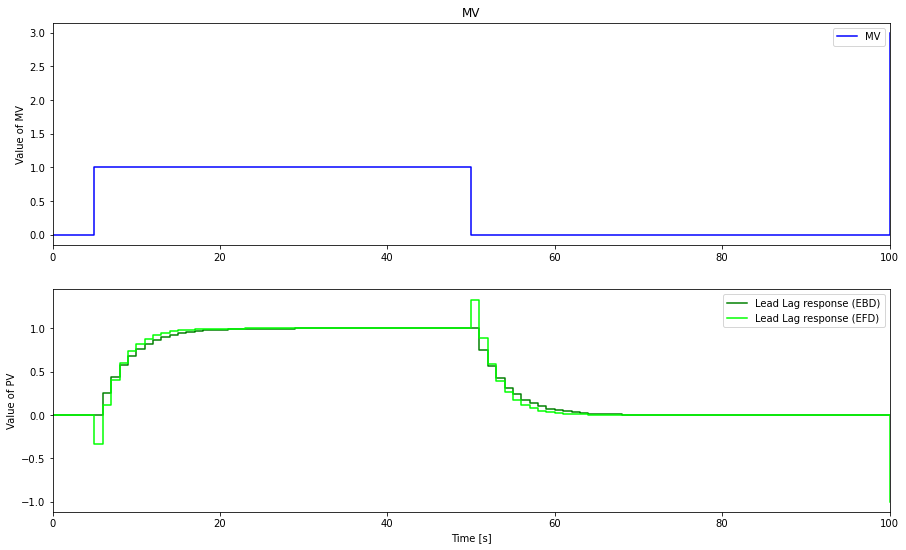

In [11]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 0, TSim: 3}

t = []
MV = []
PV_EBD = []
PV_EFD = []

# Parameters
Kp = 1
TLead = -1
TLag = 3

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    LeadLag_RT(MV, Kp, TLead, TLag, Ts, PV_EBD,0," EBD")
    LeadLag_RT(MV, Kp, TLead, TLag, Ts, PV_EFD,0,'EFD')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('MV')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead Lag response (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead Lag response (EFD)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])